<a href="https://colab.research.google.com/github/beedoop1/climate/blob/main/final_climate_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The purpose of this project is to identify one trend in one or all of the time series datasets provided. We will examine these time series for evidence of long-term trends such as warming oceans temperatures and more frequent or intense storms.

## Description

The data was sourced from the ERA5 Renanylis Product. ERA5 is produced by the European Center for Medium-Range Weather Forecasting (ECMWF), widely regarded as the best forecasting center in the world. The datasets given spans over 80 years of daily sea surface temperature, wave height, and wind speed data from seven major ocean basins: the Arctic, North Atlantic, South Atlantic, Indian, North Pacific, South Pacific, and Southern Oceans. The two datasets used will be for the North Atlantic and North Pacific as they surround the United States.

Link to ERA5 Reanalysis Product: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview

## Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from scipy.ndimage import uniform_filter1d
from scipy.ndimage import median_filter

## Loading data set

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/beedoop1/climate/main/north_atlantic.csv')

Inspecting the datasets

In [ ]:
df.head()

,sst,u10,hsig,time,latitude,longitude
0,292.86615,10.328670,4.153670,1940-01-01 12:00:00,35.9,-41.1
1,292.79900,7.875400,3.853531,1940-01-02 12:00:00,35.9,-41.1
2,292.73737,11.206657,3.518368,1940-01-03 12:00:00,35.9,-41.1
3,292.67316,11.615847,4.042061,1940-01-04 12:00:00,35.9,-41.1
4,292.61040,15.107924,5.225357,1940-01-05 12:00:00,35.9,-41.1


Making sure we don't have any null values.

In [ ]:
df.isna().sum()

sst          0
u10          0
hsig         0
time         0
latitude     0
longitude    0
dtype: int64

Checking the data types of the variables.

In [ ]:
df.dtypes

sst          float64
u10          float64
hsig         float64
time          object
latitude     float64
longitude    float64
dtype: object

Changing the data type of the time varaible to datatime.

In [ ]:
df['time'] = pd.to_datetime(df['time'])

In [ ]:
sst = df['sst'].values.reshape(-1, 1)
wind_speed = df['u10'].values.reshape(-1, 1)
wave_height = df['hsig'].values.reshape(-1, 1)
time = df['time']

## Analysis

Sea Surface Temperature GRAPHS

Making two plots to determine what the moving average is in 5 years and in 20 years for sea surface temperature.

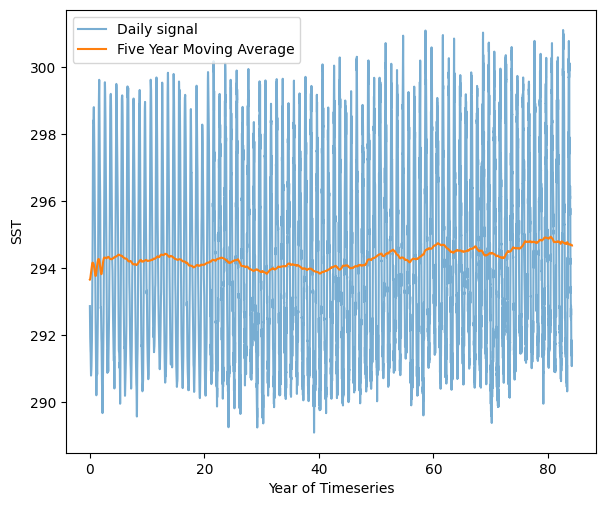

In [ ]:
sst = df["sst"].values
t = np.arange(len(sst))

window_len = 365 * 5
sst_ma = uniform_filter1d(sst, size=window_len)

fig, ax = plt.subplots()
ax.plot(t / 365, sst, alpha=0.6, label="Daily signal")
ax.plot(t / 365, sst_ma, label="Five Year Moving Average")
ax.set_xlabel("Year of Timeseries")
ax.set_ylabel("SST")
ax.legend()
fig.set_size_inches(6, 5)
fig.tight_layout(pad=0.5)

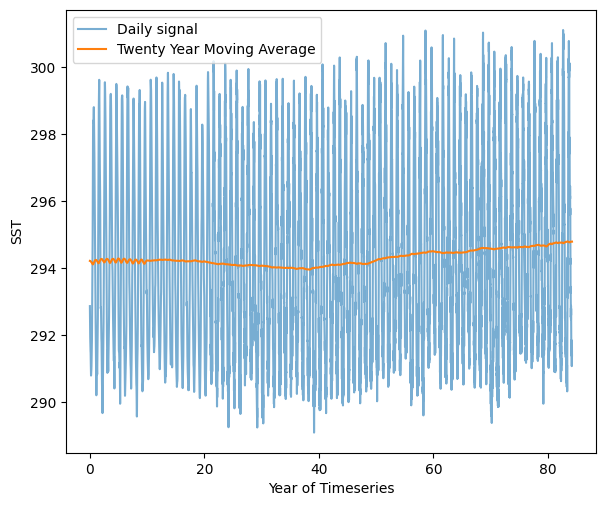

In [ ]:
sst = df["sst"].values
t = np.arange(len(sst))

window_len = 365 * 20
sst_ma = uniform_filter1d(sst, size=window_len)

fig, ax = plt.subplots()
ax.plot(t / 365, sst, alpha=0.6, label="Daily signal")
ax.plot(t / 365, sst_ma, label="Twenty Year Moving Average")
ax.set_xlabel("Year of Timeseries")
ax.set_ylabel("SST")
ax.legend()
fig.set_size_inches(6, 5)
fig.tight_layout(pad=0.5)

In the graph with a 5 year moving average, we see there are a lot of jumps in temperature throughout the years. While there are a lot of jumps, the temperature is always relatively the moving average is always around the same range. This is also reflected in the twenty year moving average as there was a lot of micro jumps at the start of the plot, but as the plot progresses, it becomes more smooth, and from the looks of it, it seems the sea surface temperature is currently rising.

WIND SPEED GRAPHS

Making two plots to determine what the moving average is in 5 years and in 20 years for wind speed.

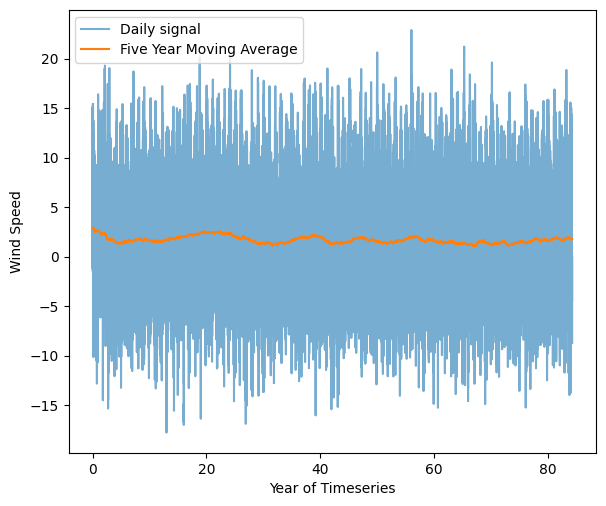

In [ ]:
wind_speed = df["u10"].values
t = np.arange(len(wind_speed))

window_len = 365 * 5
wind_speed_ma = uniform_filter1d(wind_speed, size=window_len)

fig, ax = plt.subplots()
ax.plot(t / 365, wind_speed, alpha=0.6, label="Daily signal")
ax.plot(t / 365, wind_speed_ma, label="Five Year Moving Average")
ax.set_xlabel("Year of Timeseries")
ax.set_ylabel("Wind Speed")
ax.legend()
fig.set_size_inches(6, 5)
fig.tight_layout(pad=0.5)

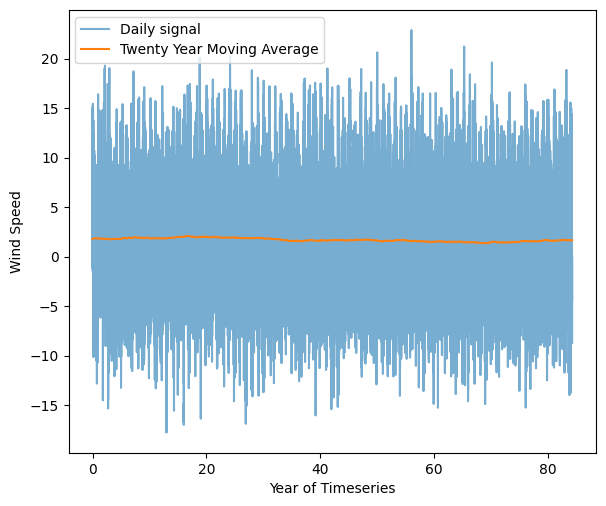

In [ ]:
wind_speed = df["u10"].values
t = np.arange(len(wind_speed))

window_len = 365 * 20
wind_speed_ma = uniform_filter1d(wind_speed, size=window_len)

fig, ax = plt.subplots()
ax.plot(t / 365, wind_speed, alpha=0.6, label="Daily signal")
ax.plot(t / 365, wind_speed_ma, label="Twenty Year Moving Average")
ax.set_xlabel("Year of Timeseries")
ax.set_ylabel("Wind Speed")
ax.legend()
fig.set_size_inches(6, 5)
fig.tight_layout(pad=0.5)

For the wind speed, there are times when the daily signal of the wind speed is really high, but the moving average is always around the same value for both the 5 and 20 year moving average. So we can predict that the wind speed will most likely stay this way for a while unless other factors cause the wind speed to change drastically.

Making two plots to determine what the moving average is in 5 years and in 20 years for wave height.

WAVE HEIGHT GRAPHS

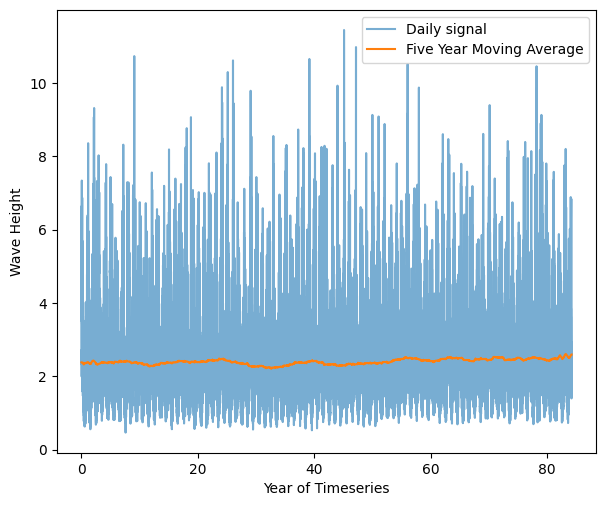

In [ ]:
wave_height = df["hsig"].values
t = np.arange(len(wave_height))

window_len = 365 * 5
wave_height_ma = uniform_filter1d(wave_height, size=window_len)

fig, ax = plt.subplots()
ax.plot(t / 365, wave_height, alpha=0.6, label="Daily signal")
ax.plot(t / 365, wave_height_ma, label="Five Year Moving Average")
ax.set_xlabel("Year of Timeseries")
ax.set_ylabel("Wave Height")
ax.legend()
fig.set_size_inches(6, 5)
fig.tight_layout(pad=0.5)

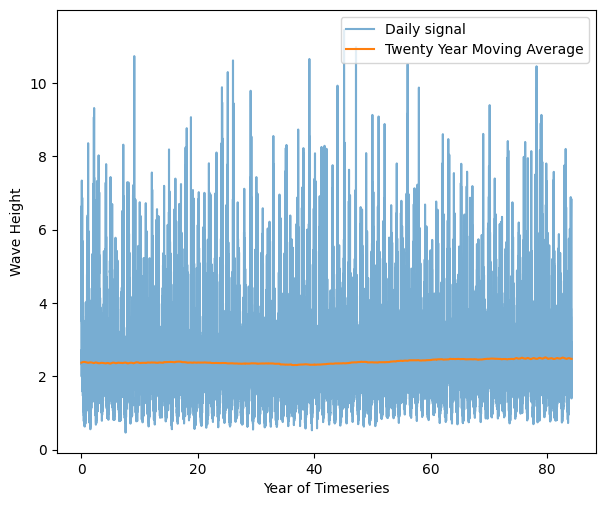

In [ ]:
wave_height = df["hsig"].values
t = np.arange(len(wave_height))

window_len = 365 * 20
wave_height_ma = uniform_filter1d(wave_height, size=window_len)

fig, ax = plt.subplots()
ax.plot(t / 365, wave_height, alpha=0.6, label="Daily signal")
ax.plot(t / 365, wave_height_ma, label="Twenty Year Moving Average")
ax.set_xlabel("Year of Timeseries")
ax.set_ylabel("Wave Height")
ax.legend()
fig.set_size_inches(6, 5)
fig.tight_layout(pad=0.5)

From seeing the daily signals, we see that the wave height does change pretty frequently. Certain weather could be the cause of this for example the amount of rain or the wind speed. Combining the both together causes the wave height to increase. There is nothing too off about the moving average as it indicates that in the  five and twenty year moving average, the wave height should keep fluctuating around the same values.

Additional Question: Can we predict future sea surface temperatures using wind speed and wave height data?

Creating a train test split to create a graph to forecast the sea surface temperature within the next 20 years.

In [ ]:
k = 365 * 20

train_indices = list(range(len(df) // 2))
test_indices = list(range(len(df) // 2, len(df)))


sst_train = sst[train_indices, :]
sst_test = sst[test_indices, :]
wind_speed_train = wind_speed[train_indices, :]
wind_speed_test = wind_speed[test_indices, :]
wave_height_train = wave_height[train_indices, :]
wave_height_test = wave_height[test_indices, :]

sst_lagged_train = sst_train[:-k, :]
sst_lagged_test = sst_test[:-k, :]
wind_speed_lagged_train = wind_speed_train[k:, :]
wind_speed_lagged_test = wind_speed_test[k:, :]
wave_height_lagged_train = wave_height_train[k:, :]
wave_height_lagged_test = wave_height_test[k:, :]

wind_wave_train = np.concatenate([wind_speed_lagged_train, wave_height_lagged_train], axis=1)
wind_wave_test = np.concatenate([wind_speed_lagged_test, wave_height_lagged_test], axis=1)


reg = LinearRegression().fit(wind_wave_train, sst_lagged_train)
sst_predicted = reg.predict(wind_wave_test)
mae = np.nanmean(np.abs(sst_predicted - sst_lagged_test))

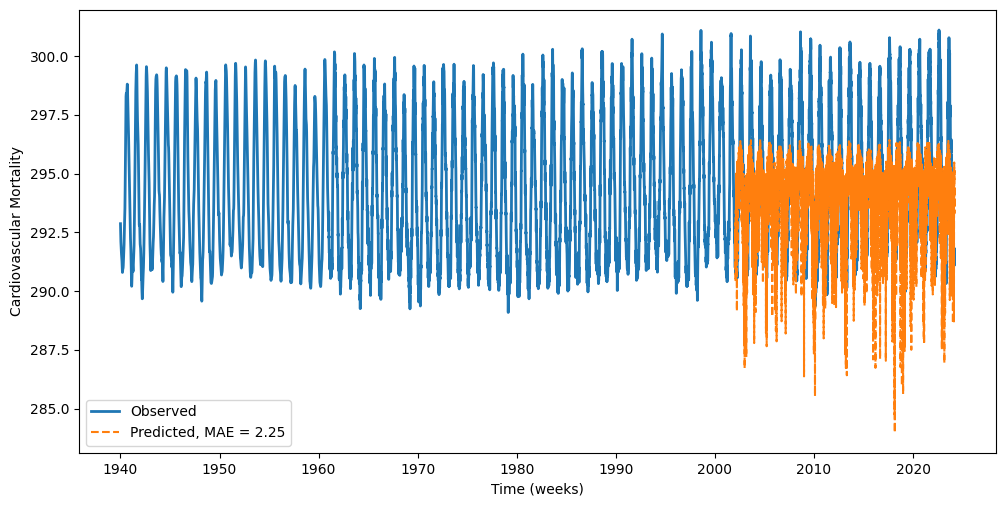

In [ ]:
fig, ax = plt.subplots()
ax.plot(time, sst, '-', linewidth=2, label="Observed")
ax.plot(time[test_indices[k:]], sst_predicted, '--', label=f"Predicted, MAE = {mae:.2f}")
ax.legend()
ax.set_xlabel("Time (weeks)") # Years
ax.set_ylabel("Cardiovascular Mortality") # Sea Surface Temperature
fig.set_size_inches(10, 5)
fig.tight_layout(pad=0.5)
plt.show()

Judging from the graph, we can tell that wind speed and wave height does play a role in affecting the sea surface temperature. An assumption that can be made is that the wind speed or wave height was high in the training data which is why the prediction of the forecast of the sea surface temperature seems off compared to the prediction. However, if the wind speed was low, this would directly correlate to a lower temperature and that could be said true about the wave height.

## Conclusion

Through the analysis using plots, we can conclude that the sea surface temperature, wind speed, and wave height will stay around the same throughout the next 20 years in the Northern Pacific Ocean based on the prediction. While there are days where there might be changes, there will be nothing too alarming based on the predictions. Also, the sea surface temperature can be affected by the wind speed and wave height. These two play a crucial part in how the sea surface temperature changes, but we must also take into account that there are more factors that contributes to these changes than just these two factors.